<a href="https://colab.research.google.com/github/cecellhax/analises_covid19/blob/main/covid19_casos_comparacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise de dados da COVID-19 do Brasil, China, Itália, Estados Unidos e Índia**

In [107]:
import pandas as pd

In [108]:
#Importando o dataset
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

casos_globais = pd.read_csv(url)

In [109]:
#Mostrando o dataframe
casos_globais.head

<bound method NDFrame.head of     Province/State      Country/Region        Lat  ...  3/29/21  3/30/21  3/31/21
0              NaN         Afghanistan  33.939110  ...    56322    56384    56454
1              NaN             Albania  41.153300  ...   124419   124723   125157
2              NaN             Algeria  28.033900  ...   116946   117061   117192
3              NaN             Andorra  42.506300  ...    11888    11944    12010
4              NaN              Angola -11.202700  ...    22132    22182    22311
..             ...                 ...        ...  ...      ...      ...      ...
269            NaN             Vietnam  14.058324  ...     2594     2594     2603
270            NaN  West Bank and Gaza  31.952200  ...   238248   240065   242353
271            NaN               Yemen  15.552727  ...     4115     4247     4357
272            NaN              Zambia -13.133897  ...    88012    88199    88418
273            NaN            Zimbabwe -19.015438  ...    36839    3

In [110]:
#Mostrando os tipos das colunas do dataframe
casos_globais.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
3/27/21             int64
3/28/21             int64
3/29/21             int64
3/30/21             int64
3/31/21             int64
Length: 439, dtype: object

In [111]:
#Eliminando as colunas de latitude e longitude
casos_globais = casos_globais.drop(['Lat', 'Long'], axis=1)

In [112]:
#Mostrando o dataframe sem latitude e longitude
casos_globais.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,55580,55604,55617,55646,55664,55680,55696,55707,55714,55733,55759,55770,55775,55827,55840,55847,55876,55876,55894,55917,55959,55959,55985,55985,55995,56016,56044,56069,56093,56103,56153,56177,56192,56226,56254,56290,56294,56322,56384,56454
1,NaN,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,99062,100246,101285,102306,103327,104313,105229,106215,107167,107931,108823,109674,110521,111301,112078,112897,113580,114209,114840,115442,116123,116821,117474,118017,118492,118938,119528,120022,120541,121200,121544,121847,122295,122767,123216,123641,124134,124419,124723,125157
2,NaN,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,111764,111917,112094,112279,112461,112622,112805,112960,113092,113255,113430,113593,113761,113948,114104,114234,114382,114543,114681,114851,115008,115143,115265,115410,115540,115688,115842,115970,116066,116157,116255,116349,116438,116543,116657,116750,116836,116946,117061,117192
3,NaN,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10672,10699,10712,10739,10775,10799,10822,10849,10866,10889,10908,10948,10976,10998,11019,11042,11069,11089,11130,11130,11199,11228,11266,11289,11319,11360,11393,11431,11481,11517,11545,11591,11638,11687,11732,11809,11850,11888,11944,12010
4,NaN,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20499,20519,20548,20584,20640,20695,20759,20782,20807,20854,20882,20923,20981,21026,21055,21086,21108,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558,21642,21696,21733,21757,21774,21836,21914,21961,22031,22063,22132,22182,22311


In [113]:
#Eliminando a divisão por provincias de países do dataframe
casos_globais = casos_globais.groupby('Country/Region').sum()

In [115]:
casos_globais.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,55580,55604,55617,55646,55664,55680,55696,55707,55714,55733,55759,55770,55775,55827,55840,55847,55876,55876,55894,55917,55959,55959,55985,55985,55995,56016,56044,56069,56093,56103,56153,56177,56192,56226,56254,56290,56294,56322,56384,56454
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,99062,100246,101285,102306,103327,104313,105229,106215,107167,107931,108823,109674,110521,111301,112078,112897,113580,114209,114840,115442,116123,116821,117474,118017,118492,118938,119528,120022,120541,121200,121544,121847,122295,122767,123216,123641,124134,124419,124723,125157
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,111764,111917,112094,112279,112461,112622,112805,112960,113092,113255,113430,113593,113761,113948,114104,114234,114382,114543,114681,114851,115008,115143,115265,115410,115540,115688,115842,115970,116066,116157,116255,116349,116438,116543,116657,116750,116836,116946,117061,117192
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10672,10699,10712,10739,10775,10799,10822,10849,10866,10889,10908,10948,10976,10998,11019,11042,11069,11089,11130,11130,11199,11228,11266,11289,11319,11360,11393,11431,11481,11517,11545,11591,11638,11687,11732,11809,11850,11888,11944,12010
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20499,20519,20548,20584,20640,20695,20759,20782,20807,20854,20882,20923,20981,21026,21055,21086,21108,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558,21642,21696,21733,21757,21774,21836,21914,21961,22031,22063,22132,22182,22311


In [199]:
import matplotlib.pyplot as plt

In [242]:
#Função para plotagem de graficos de linhas
def Grafico_de_linha(data, casos, pais):
    titulo = 'Total de casos confirmados da COVID-19 no(a)'+ ' ' + pais
    plt.figure(figsize = (18,7))
    plt.ticklabel_format(style = 'plain')
    plt.xticks(rotation = 60)
    plt.title(titulo,
              position=(0.5, 1.02),
              fontdict={'family': 'sans serif',
                        'color' : 'black',
                        'weight': 'bold',
                        'size': 18})
    plt.xlabel('Data mm/dd/aa',
               fontdict={'family': 'sans serif',
                         'color' : 'black',
                         'weight': 'bold',
                         'size': 12})
    plt.ylabel('Número de casos confirmados',
               fontdict={'family': 'sans serif',
                         'color' : 'black',
                         'weight': 'bold',
                         'size': 12})
    plt.plot(data, casos)
    plt.show()

# **Dados Brasil**

In [118]:
#Criando uma serie apenas com as imformações do Brasil
casos_brasil = casos_globais.loc['Brazil']

In [119]:
casos_brasil.head()

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Brazil, dtype: int64

In [194]:
#Comprimindo o dataframe para conter apenas as informações de 10 em 10 dias
casos_brasil = casos_brasil.loc[::10]

In [195]:
#Aribuindo a listas separadas as informações de data(data) e numeros de casos confirmados por data(casos) 
data_br = casos_brasil.index
casos_br = casos_brasil.values

In [196]:
#A lista 'data' recebeu os valores de index do dataframe 'casos_brasil'
data_br

Index(['1/22/20', '2/1/20', '2/11/20', '2/21/20', '3/2/20', '3/12/20',
       '3/22/20', '4/1/20', '4/11/20', '4/21/20', '5/1/20', '5/11/20',
       '5/21/20', '5/31/20', '6/10/20', '6/20/20', '6/30/20', '7/10/20',
       '7/20/20', '7/30/20', '8/9/20', '8/19/20', '8/29/20', '9/8/20',
       '9/18/20', '9/28/20', '10/8/20', '10/18/20', '10/28/20', '11/7/20',
       '11/17/20', '11/27/20', '12/7/20', '12/17/20', '12/27/20', '1/6/21',
       '1/16/21', '1/26/21', '2/5/21', '2/15/21', '2/25/21', '3/7/21',
       '3/17/21', '3/27/21'],
      dtype='object')

In [198]:
#A lista 'casos' recebeu os valores contidos no dataframe 'casos_brasil'
casos_br

array([       0,        0,        0,        0,        2,       52,
           1546,     6836,    20727,    43079,    92202,   169594,
         310087,   514849,   772416,  1067579,  1402041,  1800827,
        2118646,  2610102,  3035422,  3456652,  3846153,  4162073,
        4495183,  4745464,  5028444,  5224362,  5468270,  5653561,
        5911758,  6238350,  6623911,  7110434,  7484285,  7873830,
        8455059,  8933356,  9447165,  9866710, 10390461, 11019344,
       11693838, 12490362])

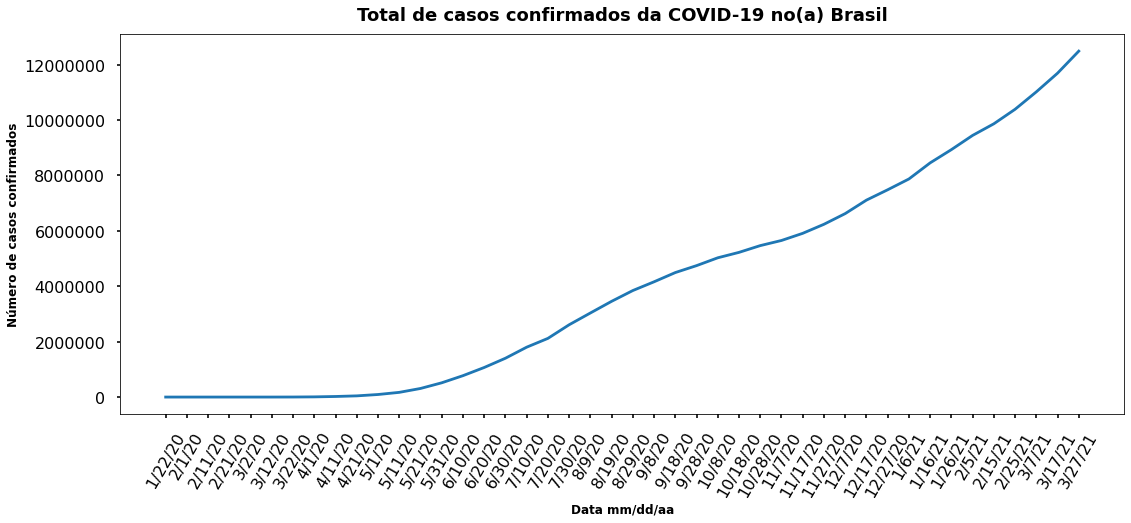

In [241]:
Grafico_de_linha(data_br, casos_br, 'Brasil')

# **Dados China**

In [206]:
casos_china = casos_globais.loc['China']

In [207]:
casos_china.describe()

count       435.000000
mean      86105.556322
std       17444.554291
min         548.000000
25%       84000.000000
50%       89784.000000
75%       94272.500000
max      101732.000000
Name: China, dtype: float64

In [208]:
casos_china = casos_china.loc[::10]
data_ch = casos_china.index
casos_ch = casos_china.values

In [209]:
data_ch

Index(['1/22/20', '2/1/20', '2/11/20', '2/21/20', '3/2/20', '3/12/20',
       '3/22/20', '4/1/20', '4/11/20', '4/21/20', '5/1/20', '5/11/20',
       '5/21/20', '5/31/20', '6/10/20', '6/20/20', '6/30/20', '7/10/20',
       '7/20/20', '7/30/20', '8/9/20', '8/19/20', '8/29/20', '9/8/20',
       '9/18/20', '9/28/20', '10/8/20', '10/18/20', '10/28/20', '11/7/20',
       '11/17/20', '11/27/20', '12/7/20', '12/17/20', '12/27/20', '1/6/21',
       '1/16/21', '1/26/21', '2/5/21', '2/15/21', '2/25/21', '3/7/21',
       '3/17/21', '3/27/21'],
      dtype='object')

In [210]:
casos_ch

array([   548,  11891,  44386,  75550,  80136,  80932,  81435,  82361,
        83014,  83853,  83959,  84011,  84063,  84146,  84209,  84553,
        84785,  84992,  85622,  87489,  88793,  89527,  89863,  90087,
        90311,  90505,  90728,  90972,  91271,  91622,  91885,  92586,
        93670,  94734,  95632,  96398,  97775,  99541, 100318, 100624,
       100851, 101132, 101460, 101663])

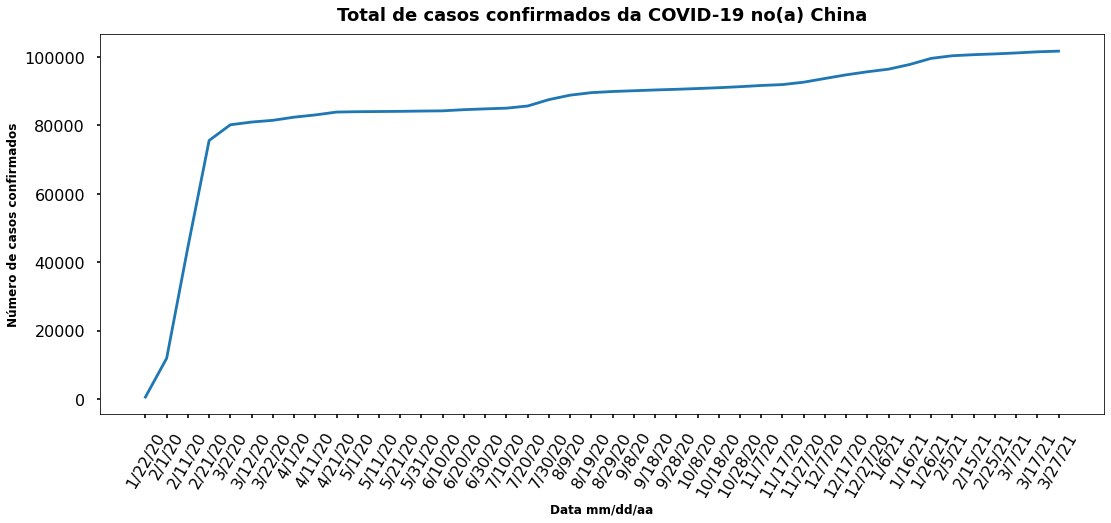

In [243]:
Grafico_de_linha(data_ch, casos_ch, 'China')

# **Dados Itália**

In [212]:
casos_italia = casos_globais.loc['Italy']
casos_italia = casos_italia.loc[::10]
data_it = casos_italia.index
casos_it = casos_italia.values

In [213]:
data_it

Index(['1/22/20', '2/1/20', '2/11/20', '2/21/20', '3/2/20', '3/12/20',
       '3/22/20', '4/1/20', '4/11/20', '4/21/20', '5/1/20', '5/11/20',
       '5/21/20', '5/31/20', '6/10/20', '6/20/20', '6/30/20', '7/10/20',
       '7/20/20', '7/30/20', '8/9/20', '8/19/20', '8/29/20', '9/8/20',
       '9/18/20', '9/28/20', '10/8/20', '10/18/20', '10/28/20', '11/7/20',
       '11/17/20', '11/27/20', '12/7/20', '12/17/20', '12/27/20', '1/6/21',
       '1/16/21', '1/26/21', '2/5/21', '2/15/21', '2/25/21', '3/7/21',
       '3/17/21', '3/27/21'],
      dtype='object')

In [214]:
casos_it

array([      0,       2,       3,      20,    2036,   15113,   59138,
        110574,  152271,  183957,  207428,  219814,  228006,  232997,
        235763,  238275,  240578,  242639,  244624,  247158,  250566,
        255278,  266853,  280153,  294932,  311364,  338398,  414241,
        589766,  902490, 1238072, 1538217, 1742557, 1906377, 2047696,
       2201945, 2368733, 2485956, 2611659, 2729223, 2868435, 3067486,
       3281810, 3512453])

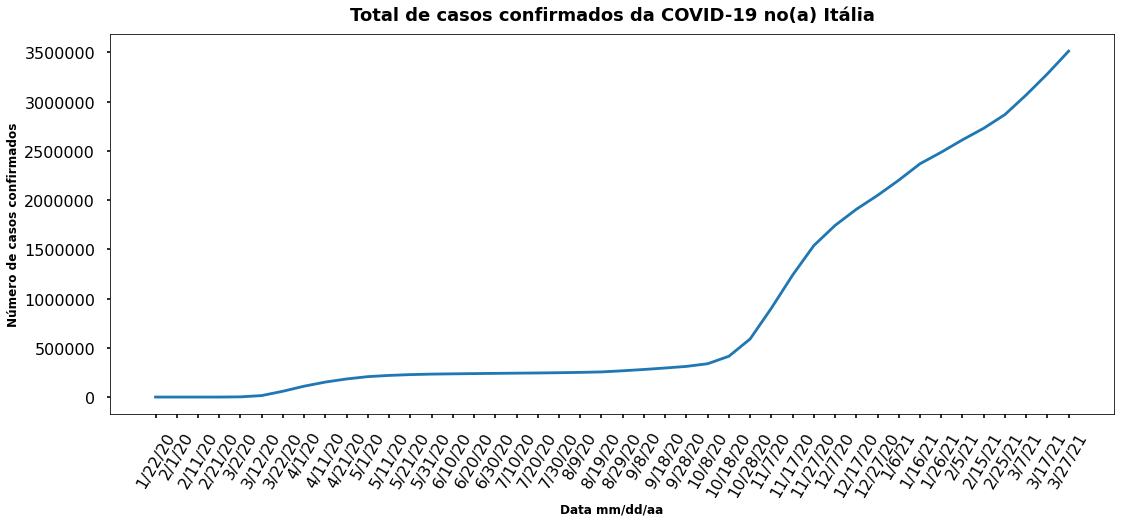

In [244]:
Grafico_de_linha(data_it, casos_it, 'Itália')

# **Dados Estados Unidos**

In [215]:
casos_estados_unidos = casos_globais.loc['US']
casos_estados_unidos = casos_estados_unidos.loc[::10]
data_us = casos_estados_unidos.index
casos_us = casos_estados_unidos.values

In [216]:
data_us

Index(['1/22/20', '2/1/20', '2/11/20', '2/21/20', '3/2/20', '3/12/20',
       '3/22/20', '4/1/20', '4/11/20', '4/21/20', '5/1/20', '5/11/20',
       '5/21/20', '5/31/20', '6/10/20', '6/20/20', '6/30/20', '7/10/20',
       '7/20/20', '7/30/20', '8/9/20', '8/19/20', '8/29/20', '9/8/20',
       '9/18/20', '9/28/20', '10/8/20', '10/18/20', '10/28/20', '11/7/20',
       '11/17/20', '11/27/20', '12/7/20', '12/17/20', '12/27/20', '1/6/21',
       '1/16/21', '1/26/21', '2/5/21', '2/15/21', '2/25/21', '3/7/21',
       '3/17/21', '3/27/21'],
      dtype='object')

In [217]:
casos_us

array([       1,        8,       13,       16,       55,     1586,
          34898,   224544,   544185,   825429,  1115946,  1358293,
        1587596,  1798718,  2000757,  2255823,  2642174,  3192841,
        3839545,  4498699,  5046461,  5529973,  5956983,  6329571,
        6730176,  7152521,  7614586,  8165781,  8885540,  9972156,
       11471140, 13213975, 15108895, 17322903, 19254921, 21436510,
       23836221, 25502943, 26876802, 27763143, 28454403, 29063721,
       29609146, 30219348])

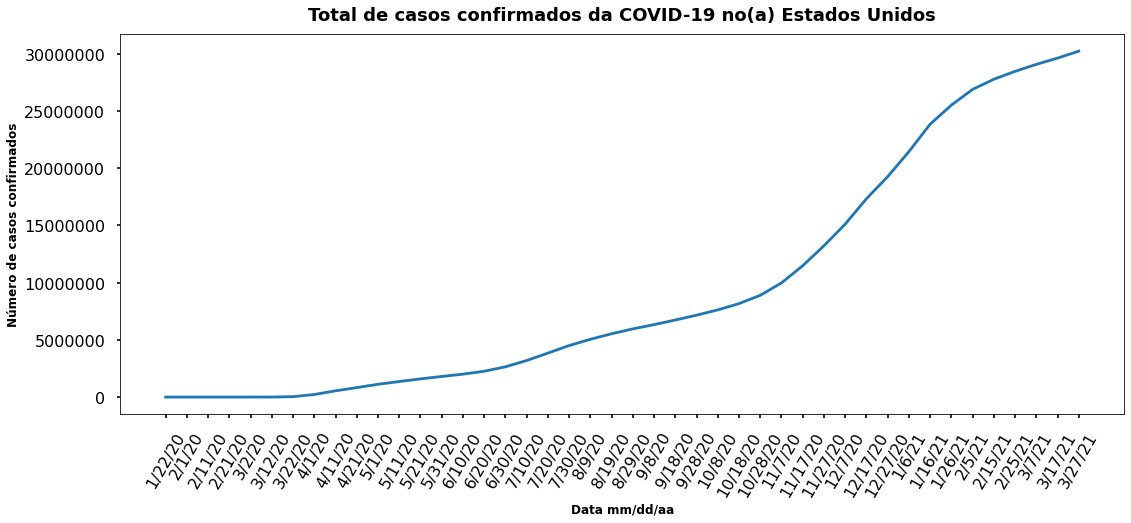

In [245]:
Grafico_de_linha(data_us, casos_us, 'Estados Unidos')

# **Dados Índia**

In [223]:
casos_india = casos_globais.loc['India']
casos_india = casos_india.loc[::10]
data_id = casos_india.index
casos_id = casos_india.values

In [224]:
casos_id

array([       0,        1,        3,        3,        5,       73,
            396,     1998,     8446,    20080,    37257,    70768,
         118226,   190609,   286605,   410451,   585481,   820916,
        1155338,  1634746,  2215074,  2836925,  3542733,  4370128,
        5308014,  6145291,  6906151,  7550273,  8040203,  8507754,
        8912907,  9351109,  9703770,  9979447, 10207871, 10395278,
       10557985, 10689527, 10814304, 10925710, 11063491, 11229398,
       11474605, 11971624])

In [225]:
data_id

Index(['1/22/20', '2/1/20', '2/11/20', '2/21/20', '3/2/20', '3/12/20',
       '3/22/20', '4/1/20', '4/11/20', '4/21/20', '5/1/20', '5/11/20',
       '5/21/20', '5/31/20', '6/10/20', '6/20/20', '6/30/20', '7/10/20',
       '7/20/20', '7/30/20', '8/9/20', '8/19/20', '8/29/20', '9/8/20',
       '9/18/20', '9/28/20', '10/8/20', '10/18/20', '10/28/20', '11/7/20',
       '11/17/20', '11/27/20', '12/7/20', '12/17/20', '12/27/20', '1/6/21',
       '1/16/21', '1/26/21', '2/5/21', '2/15/21', '2/25/21', '3/7/21',
       '3/17/21', '3/27/21'],
      dtype='object')

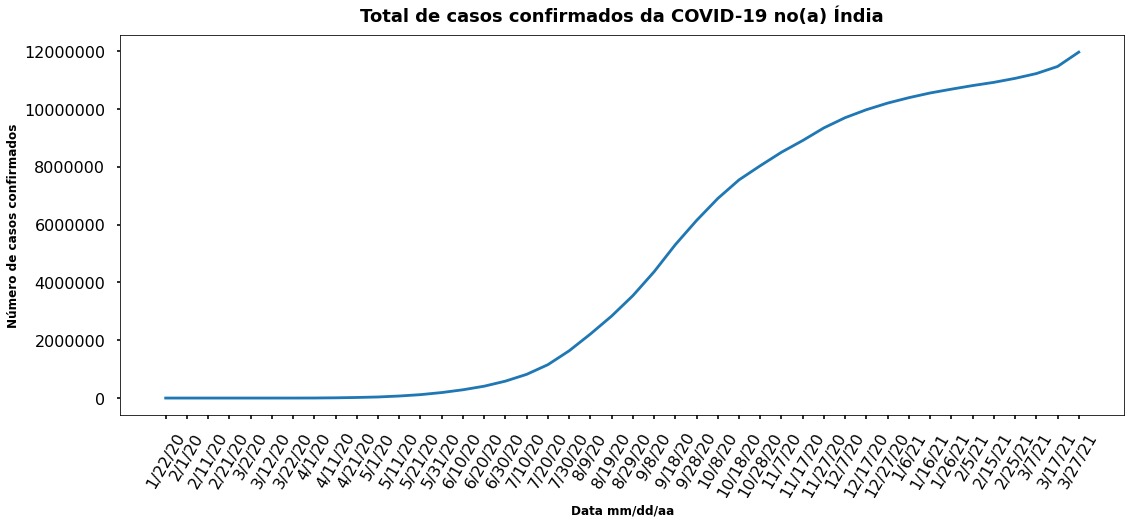

In [246]:
Grafico_de_linha(data_id, casos_id, 'Índia')

# **Comparando os países**

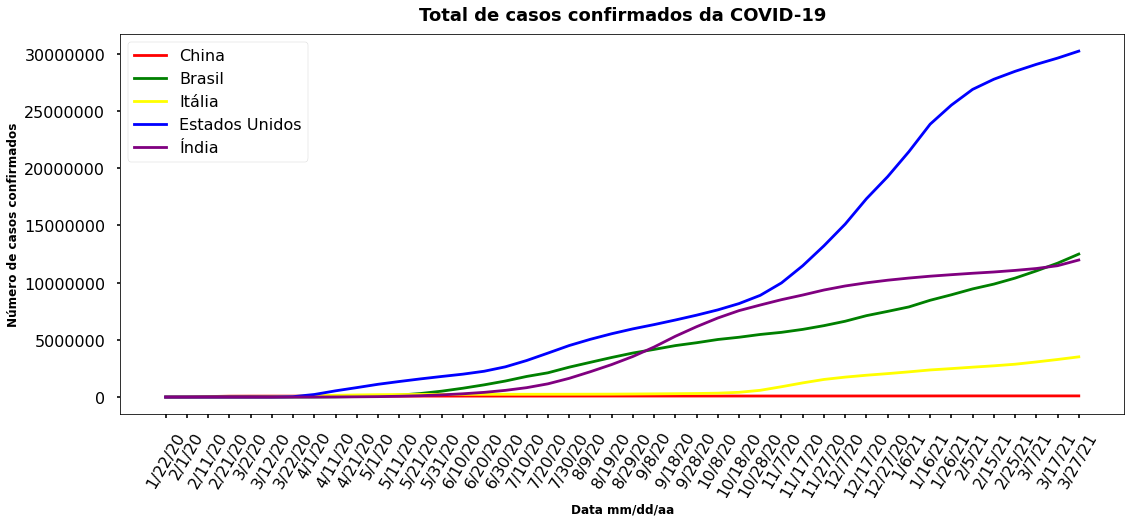

In [249]:
plt.figure(figsize = (18,7))
plt.ticklabel_format(style = 'plain')
plt.xticks(rotation = 60)
plt.title('Total de casos confirmados da COVID-19',
          position=(0.5, 1.02),
          fontdict={'family': 'sans serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
plt.xlabel('Data mm/dd/aa',
           fontdict={'family': 'sans serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 12})
plt.ylabel('Número de casos confirmados',
           fontdict={'family': 'sans serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 12})
plt.plot(data_ch, casos_ch, color = 'red')
plt.plot(casos_br, color = 'green')
plt.plot(casos_it, color = 'yellow')
plt.plot(casos_us, color = 'blue')
plt.plot(casos_id, color = 'purple')
plt.legend(['China', 'Brasil', 'Itália', 'Estados Unidos', 'Índia'])
plt.show()